# Formacion de imagen de contraste de fase

7.9. Algunos objetos interesantes, como microorganismos y patrones litograficos, son transparentes, y sus caracteristicas se manifestan en variaciones de su grosor u indice de refraccion. Para poder ver una imagen de estos objetos, se puede construir un sistema de imagen que convierte los cambios de fase en cambios en la irradiancia. 

Para esto, se realiza la FT del objeto de fase, y en el cenntro del plano de la transformada, se ubica un elemento que causa un cambio de fase de una fraccion de pi radianes. Esto causa que tras otra transformada de Fourie la energia del orden 0 o la luz no difractada por el objeto de fase interfiera con el resto de la informacion del objeto, convirtiendo los cambios de fase en cambios de irradiancia. Simulemos este sistema.




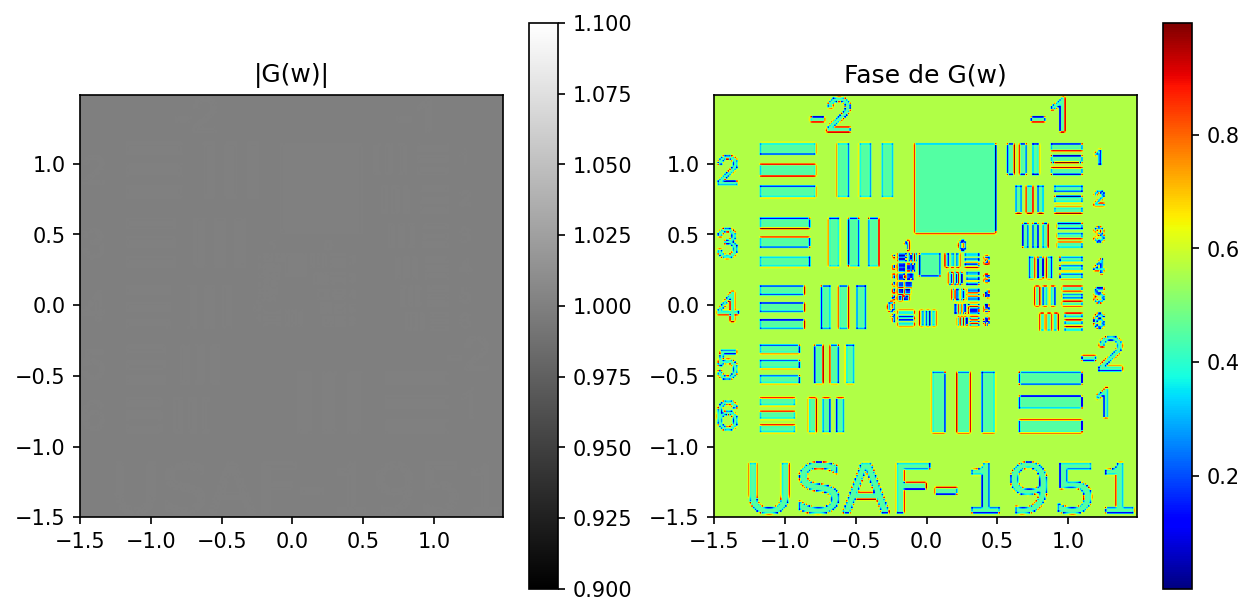

In [ ]:
import numpy as np
import scipy.fft as sft
import matplotlib.pyplot as plt
from PIL import Image as im

L=0.3e-3
M=250
dx=L/M
I=im.open('./6.bmp')
I=I.resize([M,M])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))
ug=np.exp(2*np.pi*np.sqrt(I)*1j)

x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

xx1,yy1=np.meshgrid(x1,y1)



fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1, 2, 1)

pos1 =ax1.imshow(np.abs(ug),cmap='gray', extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos1, ax=ax1)
ax1.title.set_text('|G(w)|')

ax2 = fig.add_subplot(1, 2,2)
pos2=ax2.imshow((np.angle(ug)+np.pi)/(2*np.pi),cmap='jet',extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos2, ax=ax2)
ax2.title.set_text('Fase de G(w)')
plt.show()

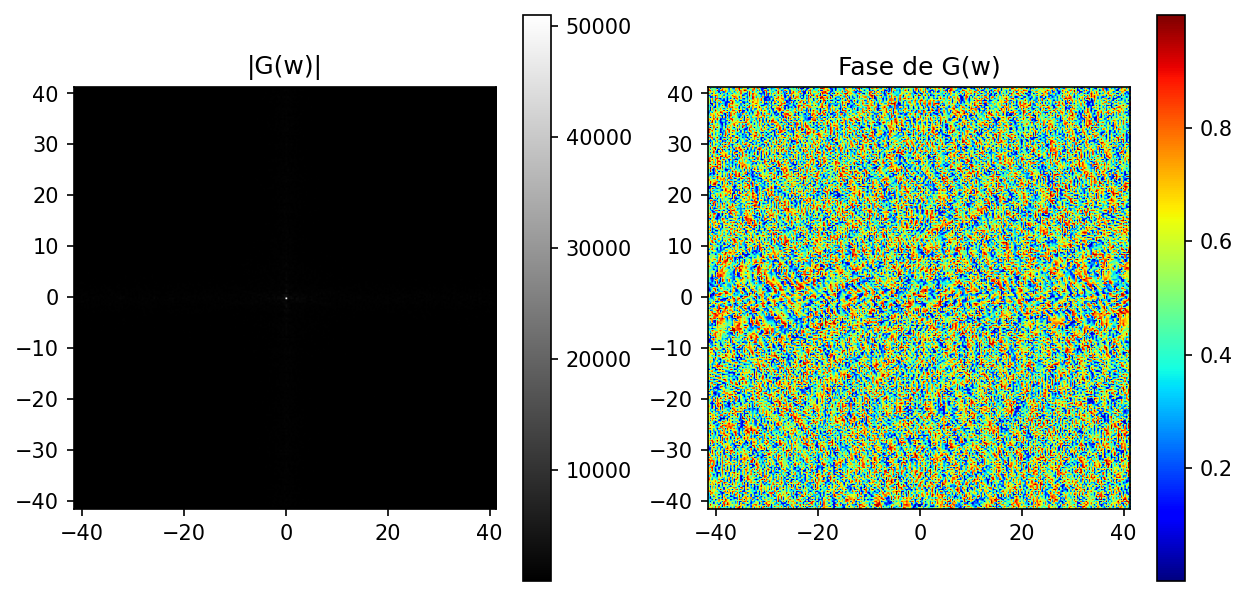

In [ ]:
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)

Uf=sft.fftshift(sft.fft2(sft.fftshift(ug)))


fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1, 2, 1)
pos1 =ax1.imshow(np.abs(Uf),cmap='gray', extent=[-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000,-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000])
fig.colorbar(pos1, ax=ax1)
ax1.title.set_text('|G(w)|')

ax2 = fig.add_subplot(1, 2,2)
pos2=ax2.imshow((np.angle(Uf)+np.pi)/(2*np.pi),cmap='jet',extent=[-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000,-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000])
fig.colorbar(pos2, ax=ax2)
ax2.title.set_text('Fase de G(w)')
plt.show()

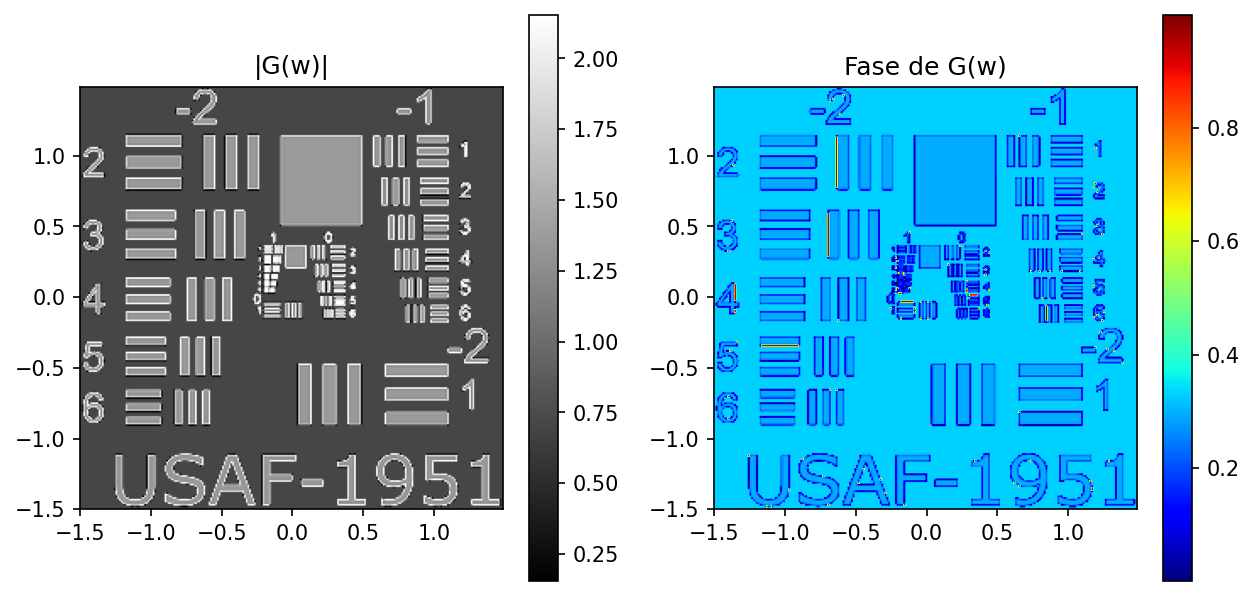

In [ ]:
Sf=Uf
Sf[125,125]=Sf[125,125]*np.exp(1j*(3*np.pi/2))

ui=sft.fftshift(sft.ifft2(sft.fftshift(Sf)))

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1, 2, 1)
pos1 =ax1.imshow(np.abs(ui),cmap='gray', extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos1, ax=ax1)
ax1.title.set_text('|G(w)|')

ax2 = fig.add_subplot(1, 2,2)
pos2=ax2.imshow((np.angle(ui)+np.pi)/(2*np.pi),cmap='jet',extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos2, ax=ax2)
ax2.title.set_text('Fase de G(w)')
plt.show()

# Holografia

7.10. Otra forma de formar imagen es por medio de la holografia. La holografia permite registar tanto la amplitud como la fase del campo electromagnetico como el patron de irradiancia producido por dos ondas. 

Una forma sencilla de hacer holografia es por medio de registrar la irradiancia de la transformada de fourier de un objeto y una fuente puntual con una separacion determinada entre ellos.

Luego, si esa irradiancia es iluminada por una onda plana, su transformada de fourier reconstruira el objeto de entrada.

Veamos como


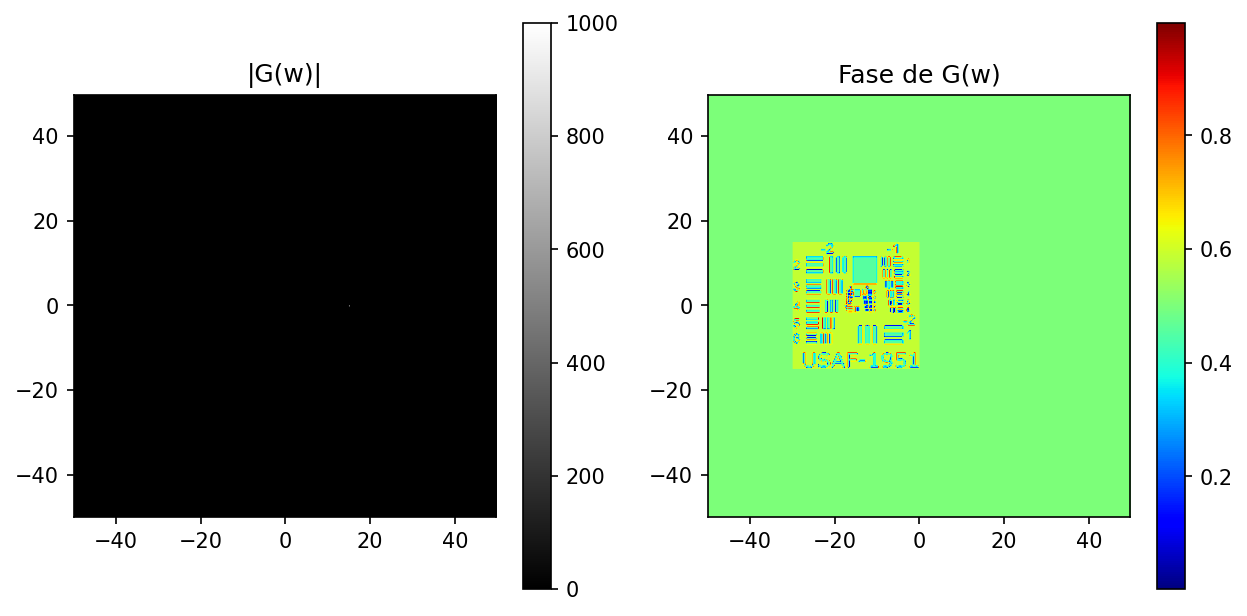

In [ ]:
L=10e-3
M=500
dx=L/M
I=im.open('./6.bmp')
I=I.resize([150            ,150])
I=1-np.asarray(I)
I=I*1.
I=I/np.max(np.max(I))
I=I-np.min(np.min(I))


x1=np.linspace(-L/2,L/2-dx,M)
y1=np.linspace(-L/2,L/2-dx,M)

xx1,yy1=np.meshgrid(x1,y1)

def tajada(M1,M2,x,y):
    """
    Esta funcion permite recortar una seccion centrada en x, y del array M1 de
    tamaño igual al array M2. Las coordenadas x,y son dadas en un sistema cartesiano centrado.

    Parameters
    ----------
    M1 : Array Numpy
        Arreglo del que se recorta una sección.
    M2 : Array Numpy
        Arreglo que determina el tamaño del recorte.
    x : Integer
        Coordenada en x del centro del recorte en un sistema cartesiano centrado para M1.
    y : Integer
        Coordenada en y del centro del recorte en un sistema cartesiano centrado para M1..

    Raises
    ------
    ValueError
        Si el tamaño del area a recortar o las coordenadas exceden el tamaño de la matriz original se disparara este error.

    Returns
    -------
    MC
        Arreglo de numpy con forma igual a M2.

    """
    (m,n)=M1.shape
    (mm,nn)=M2.shape
    if mm>m or nn>n:
        raise ValueError('La matriz recortada debe ser mas pequeña que la original')
    MC=M1[np.int32(np.ceil((m-mm)*0.5)+y):np.int32(np.ceil((m+mm)*0.5)+y),np.int32(np.ceil((n-nn)*0.5)+x):np.int32(np.ceil((m+nn)*0.5)+x)]
    return MC

def fusion(M1,M2,x,y):
    """
    Esta funcion permite insertar M2 a una seccion centrada en (x, y) del array M1.
    Las coordenadas x,y son dadas en un sistema cartesiano centrado.

    Parameters
    ----------
    M1 : Array Numpy
        Arreglo al que se inserta una sección.
    M2 : Array Numpy
        Arreglo a insertar.
    x : Integer
        Coordenada en x del centro del recorte en un sistema cartesiano centrado para M1.
    y : Integer
        Coordenada en y del centro del recorte en un sistema cartesiano centrado para M1..

    Raises
    ------
    ValueError
        Si el tamaño del area a insertar o las coordenadas exceden el tamaño de la matriz original se disparara este error.

    Returns
    -------
    MC
        Arreglo de numpy con forma igual a M1.

    """
    (m,n)=M1.shape
    (mm,nn)=M2.shape
    if mm>m or nn>n:
        raise ValueError('La matriz a instertar debe ser mas pequeña que la original')
    M1[np.int32(np.ceil((m-mm)*0.5)+y):np.int32(np.ceil((m+mm)*0.5)+y),np.int32(np.ceil((n-nn)*0.5)+x):np.int32(np.ceil((m+nn)*0.5)+x)]=M2
    MC=np.copy(M1)
    return MC


ug=np.zeros([500,500])*1j
ug=fusion(ug,np.sqrt(I)*np.exp(1j*2*np.pi*np.sqrt(I)),-75,0)
ug=fusion(ug,np.ones([1,1])*1000,75,0)



fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1, 2, 1)

pos1 =ax1.imshow(np.abs(ug),cmap='gray', extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos1, ax=ax1)
ax1.title.set_text('|G(w)|')

ax2 = fig.add_subplot(1, 2,2)
pos2=ax2.imshow((np.angle(ug)+np.pi)/(2*np.pi),cmap='jet',extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos2, ax=ax2)
ax2.title.set_text('Fase de G(w)')
plt.show()

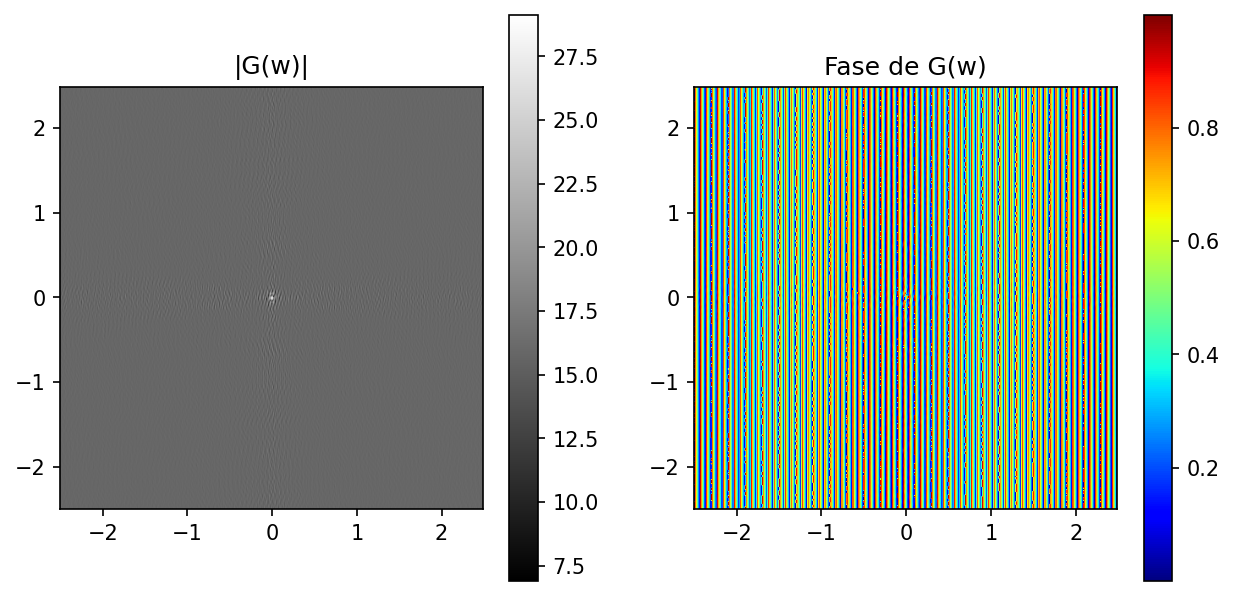

In [ ]:
fx=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)
fy=np.linspace(-1/(2*dx),1/(2*dx)-1/L,M)

Uf=sft.fftshift(sft.fft2(sft.fftshift(ug)))
H=Uf*np.conj(Uf)


fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1, 2, 1)
pos1 =ax1.imshow(np.abs(H)**(1/5),cmap='gray', extent=[-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000,-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000])
fig.colorbar(pos1, ax=ax1)
ax1.title.set_text('|G(w)|')

ax2 = fig.add_subplot(1, 2,2)
pos2=ax2.imshow((np.angle(Uf)+np.pi)/(2*np.pi),cmap='jet',extent=[-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000,-1/(2*dx)/10000,(1/(2*dx)-1/L)/10000])
fig.colorbar(pos2, ax=ax2)
ax2.title.set_text('Fase de G(w)')
plt.show()

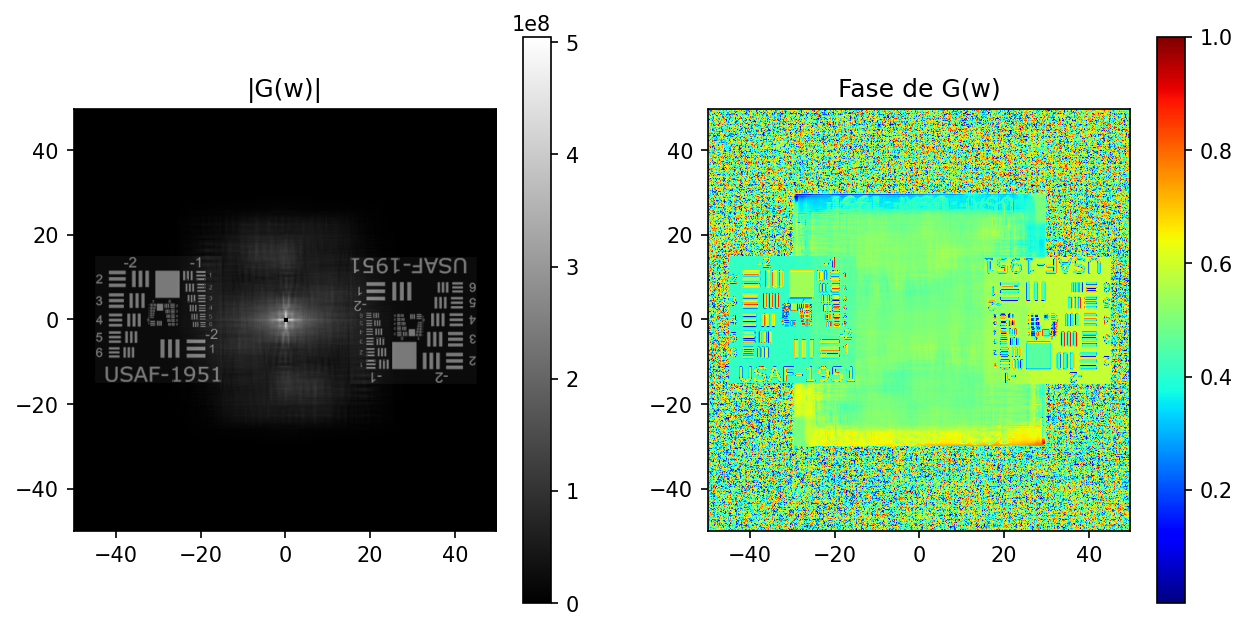

In [ ]:


ui=sft.fftshift(sft.fft2(sft.fftshift(H)))

ui=fusion(ui,np.zeros([5,5]),0,0)

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(1, 2, 1)
pos1 =ax1.imshow(np.abs(ui),cmap='gray', extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos1, ax=ax1)
ax1.title.set_text('|G(w)|')

ax2 = fig.add_subplot(1, 2,2)
pos2=ax2.imshow((np.angle(ui)+np.pi)/(2*np.pi),cmap='jet',extent=[10000*-L/2,10000*(L/2-dx),10000*-L/2,10000*(L/2-dx)])
fig.colorbar(pos2, ax=ax2)
ax2.title.set_text('Fase de G(w)')
plt.show()